In [5]:
import pandas as pd

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
import chardet

# Detect encoding
with open(r"D:\Data Science\datasets\New folder\stores_sales_forecasting.csv", 'rb') as file:
    raw_data = file.read()
    result = chardet.detect(raw_data)
    print(result)


{'encoding': 'Windows-1252', 'confidence': 0.7295238494581575, 'language': ''}


In [8]:
df = pd.read_csv(
    r"D:\Data Science\datasets\New folder\stores_sales_forecasting.csv",
    encoding='Windows-1252'
)

In [9]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
2117,9965,CA-2016-146374,12/5/2016,12/10/2016,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
2118,9981,US-2015-151435,9/6/2015,9/9/2015,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


In [11]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

# Step 1:  `Order Date` is in datetime Format

The Order Date column is currently in object format, so it needs to be converted to datetime

* `ds` for the date (must be in datetime format).
* `y` for the values to forecast (must be numeric).

In [13]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Step 2: Aggregate Sales Data by Date

Since Prophet requires the time series data to be in a specific format, we need to aggregate the sales (y) values by the Order Date (ds). This ensures that there’s only one sales value per day.

In [14]:
sales_data = df.groupby('Order Date').sum()['Sales'].reset_index()

sales_data.rename(columns={'Order Date': 'ds', 'Sales': 'y'}, inplace=True)
print(sales_data.head())

          ds         y
0 2014-01-06  2573.820
1 2014-01-07    76.728
2 2014-01-10    51.940
3 2014-01-11     9.940
4 2014-01-13   879.939


In [15]:
sales_data

,ds,y
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


# Step 3: Visualize the Aggregated Data

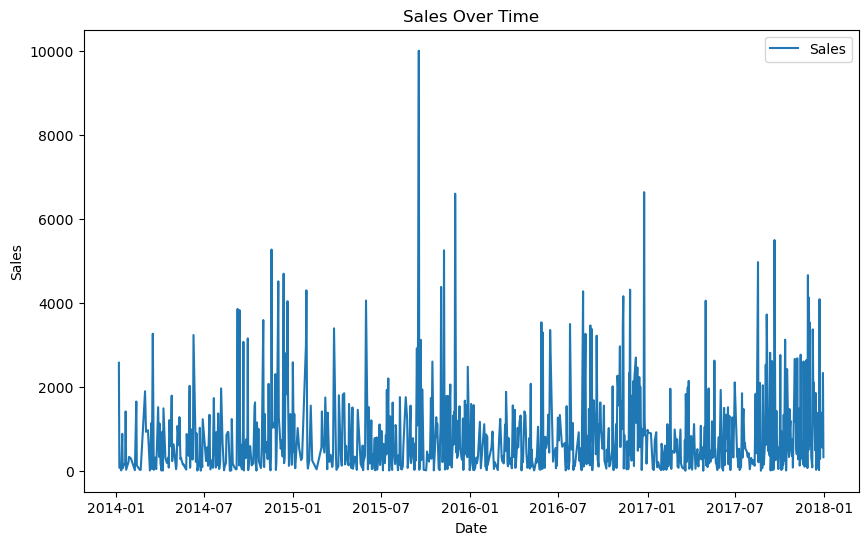

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(sales_data['ds'], sales_data['y'], label='Sales')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


# Step 4: Initialize and Fit the Prophet Model

In [17]:
from prophet import Prophet
model = Prophet()

model.fit(sales_data)


19:29:34 - cmdstanpy - INFO - Chain [1] start processing
19:29:34 - cmdstanpy - INFO - Chain [1] done processing


# Step 5: Make Future Predictions

In [18]:
future = model.make_future_dataframe(periods=90) 
forecast = model.predict(future)

print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())


            ds        yhat  yhat_lower   yhat_upper
974 2018-03-26  913.981825 -322.032879  2163.049783
975 2018-03-27  525.789076 -681.296785  1785.992736
976 2018-03-28  486.157099 -769.720934  1713.243285
977 2018-03-29  694.103627 -506.052175  1912.454982
978 2018-03-30  720.250484 -475.682820  2010.387178


In [19]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-06,746.062335,-315.933630,2169.638401,746.062335,746.062335,152.742438,152.742438,152.742438,234.750502,234.750502,234.750502,-82.008064,-82.008064,-82.008064,0.0,0.0,0.0,898.804772
1,2014-01-07,746.086349,-686.328325,1749.882963,746.086349,746.086349,-251.549676,-251.549676,-251.549676,-140.725505,-140.725505,-140.725505,-110.824172,-110.824172,-110.824172,0.0,0.0,0.0,494.536673
2,2014-01-10,746.158393,-529.545058,1845.070210,746.158393,746.158393,-98.144313,-98.144313,-98.144313,93.292702,93.292702,93.292702,-191.437015,-191.437015,-191.437015,0.0,0.0,0.0,648.014079
3,2014-01-11,746.182407,-804.182049,1561.697428,746.182407,746.182407,-329.194013,-329.194013,-329.194013,-113.389280,-113.389280,-113.389280,-215.804733,-215.804733,-215.804733,0.0,0.0,0.0,416.988394
4,2014-01-13,746.230436,-556.635263,1912.237601,746.230436,746.230436,-24.989310,-24.989310,-24.989310,234.750502,234.750502,234.750502,-259.739811,-259.739811,-259.739811,0.0,0.0,0.0,721.241126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,2018-03-26,783.047761,-322.032879,2163.049783,783.047684,783.047825,130.934064,130.934064,130.934064,234.750502,234.750502,234.750502,-103.816438,-103.816438,-103.816438,0.0,0.0,0.0,913.981825
975,2018-03-27,783.071782,-681.296785,1785.992736,783.071704,783.071847,-257.282706,-257.282706,-257.282706,-140.725505,-140.725505,-140.725505,-116.557201,-116.557201,-116.557201,0.0,0.0,0.0,525.789076
976,2018-03-28,783.095803,-769.720934,1713.243285,783.095723,783.095869,-296.938704,-296.938704,-296.938704,-167.140166,-167.140166,-167.140166,-129.798538,-129.798538,-129.798538,0.0,0.0,0.0,486.157099
977,2018-03-29,783.119824,-506.052175,1912.454982,783.119743,783.119891,-89.016197,-89.016197,-89.016197,54.125797,54.125797,54.125797,-143.141994,-143.141994,-143.141994,0.0,0.0,0.0,694.103627


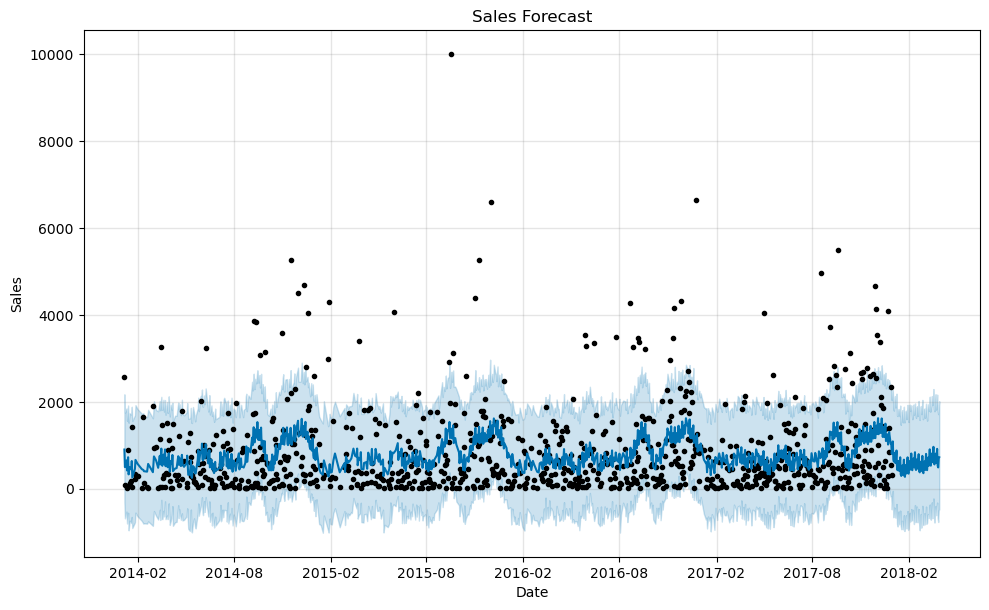

In [20]:
model.plot(forecast)
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


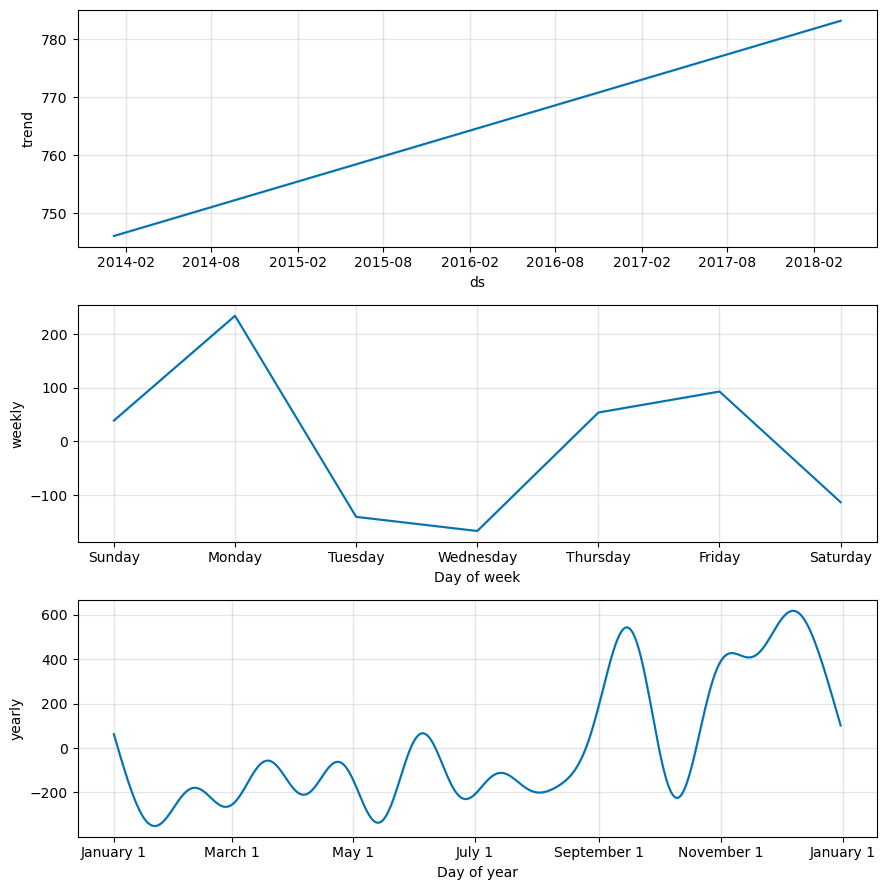

In [21]:
model.plot_components(forecast)
plt.show()


In [22]:
print("Date range in the dataset:")
print("Start Date:", sales_data['ds'].min())
print("End Date:", sales_data['ds'].max())


Date range in the dataset:
Start Date: 2014-01-06 00:00:00
End Date: 2017-12-30 00:00:00


In [23]:
# Sort the data by date to ensure chronological order
sales_data = sales_data.sort_values('ds')

# Determine the split index (80% for training)
split_index = int(len(sales_data) * 0.8)

# Get the corresponding split date
split_date = sales_data.iloc[split_index]['ds']
print("Suggested split date (80% training, 20% testing):", split_date)


Suggested split date (80% training, 20% testing): 2017-05-14 00:00:00


# Steps to Check Forecasting Accuracy

### Step 1: Split the Data into Training and Test Sets

In [24]:
# Define the split point (e.g., use 80% for training)
split_date = '2017-05-14' 
train_data = sales_data[sales_data['ds'] <= split_date]
test_data = sales_data[sales_data['ds'] > split_date]

model = Prophet()
model.fit(train_data)


19:30:04 - cmdstanpy - INFO - Chain [1] start processing
19:30:04 - cmdstanpy - INFO - Chain [1] done processing


### Step 2: Predict on the Test Set

Generate predictions for the test period.

In [26]:
future_test = test_data[['ds']]  
forecast_test = model.predict(future_test)

# Merge actual and predicted values for comparison
test_results = test_data.merge(forecast_test[['ds', 'yhat']], on='ds')


### Step 3: Calculate Accuracy Metrics

I can calculate various error metrics to assess the model's performance.

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test_results['y'], test_results['yhat'])
rmse = mean_squared_error(test_results['y'], test_results['yhat'], squared=False)
mape = (abs(test_results['y'] - test_results['yhat']) / test_results['y']).mean() * 100

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Error (MAE): 728.3878008167552
Root Mean Square Error (RMSE): 1033.3148562656631
Mean Absolute Percentage Error (MAPE): 628.23%


###  Outliers or Irregular Data

In [28]:
sales_data['y'].describe()  


count      889.000000
mean       834.645439
std       1015.317163
min          1.988000
25%        173.940000
50%        493.920000
75%       1128.390000
max      10006.174000
Name: y, dtype: float64

# Handle Outliers:

In [29]:
Q1 = sales_data['y'].quantile(0.25)
Q3 = sales_data['y'].quantile(0.75)
IQR = Q3 - Q1
filtered_data = sales_data[(sales_data['y'] >= (Q1 - 1.5 * IQR)) & (sales_data['y'] <= (Q3 + 1.5 * IQR))]


#  Log Transformation:

In [30]:
import numpy as np

sales_data['y_log'] = np.log1p(sales_data['y'])  # Log-transform sales data


In [31]:
model = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model.fit(sales_data)


19:31:30 - cmdstanpy - INFO - Chain [1] start processing
19:31:30 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
from sklearn.metrics import median_absolute_error
medae = median_absolute_error(test_results['y'], test_results['yhat'])
print(f"Median Absolute Error (MedAE): {medae}")
from sklearn.metrics import median_absolute_error
medae = median_absolute_error(test_results['y'], test_results['yhat'])
print(f"Median Absolute Error (MedAE): {medae}")


Median Absolute Error (MedAE): 504.58491812836303
Median Absolute Error (MedAE): 504.58491812836303


### The Median Absolute Error (MedAE) of 504.58 is a more robust metric than MAPE, and it indicates that after handling outliers, applying a log transformation, and adjusting for seasonal effects, the model's median error has reduced. This is an improvement, but we can still look at a few things to ensure the model is optimized further.

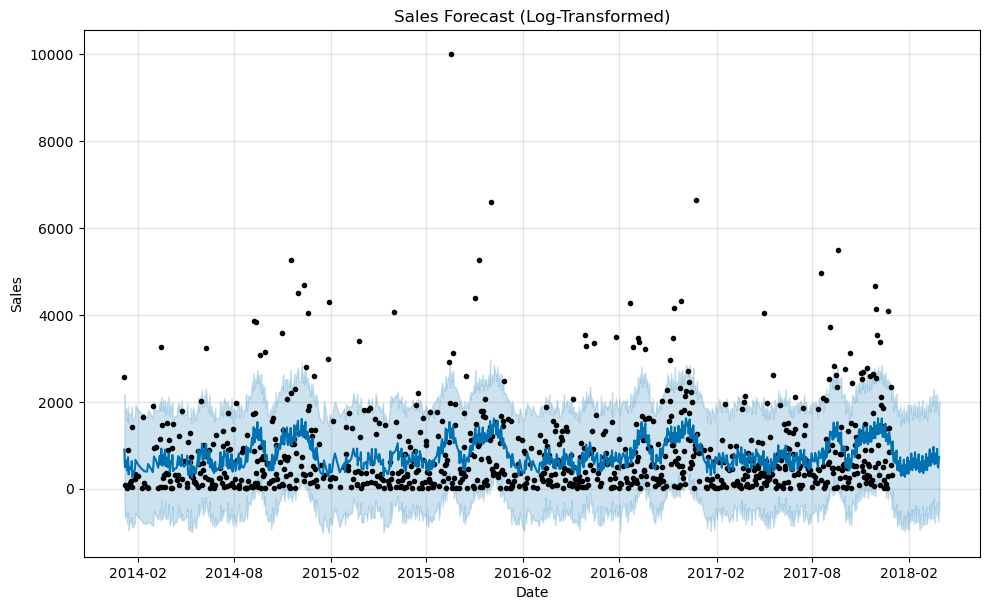

In [33]:
model.plot(forecast)
plt.title('Sales Forecast (Log-Transformed)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


# Forecast Analysis:

* The black dots represent the actual sales values.
* The blue line represents the predicted sales, while the light-blue shaded areas indicate the uncertainty intervals (confidence intervals).
* The model captures the seasonal effects and trends reasonably well, with some deviations in extreme sales values.

# Insights:

* The seasonal pattern is evident, with periodic peaks and troughs in the forecast.
* The uncertainty intervals widen over time, reflecting increasing uncertainty in long-term predictions.
* Log transformation effectively handled the outliers, making the forecast more stable.

In [34]:
forecast['yhat_backtransformed'] = np.expm1(forecast['yhat'])
forecast['yhat_lower_backtransformed'] = np.expm1(forecast['yhat_lower'])
forecast['yhat_upper_backtransformed'] = np.expm1(forecast['yhat_upper'])


In [35]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,...,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,yhat_backtransformed,yhat_lower_backtransformed,yhat_upper_backtransformed
0,2014-01-06,746.062335,-315.933630,2169.638401,746.062335,746.062335,152.742438,152.742438,152.742438,234.750502,...,-82.008064,-82.008064,-82.008064,0.0,0.0,0.0,898.804772,inf,-1.0,inf
1,2014-01-07,746.086349,-686.328325,1749.882963,746.086349,746.086349,-251.549676,-251.549676,-251.549676,-140.725505,...,-110.824172,-110.824172,-110.824172,0.0,0.0,0.0,494.536673,5.950426e+214,-1.0,inf
2,2014-01-10,746.158393,-529.545058,1845.070210,746.158393,746.158393,-98.144313,-98.144313,-98.144313,93.292702,...,-191.437015,-191.437015,-191.437015,0.0,0.0,0.0,648.014079,2.684966e+281,-1.0,inf
3,2014-01-11,746.182407,-804.182049,1561.697428,746.182407,746.182407,-329.194013,-329.194013,-329.194013,-113.389280,...,-215.804733,-215.804733,-215.804733,0.0,0.0,0.0,416.988394,1.246690e+181,-1.0,inf
4,2014-01-13,746.230436,-556.635263,1912.237601,746.230436,746.230436,-24.989310,-24.989310,-24.989310,234.750502,...,-259.739811,-259.739811,-259.739811,0.0,0.0,0.0,721.241126,inf,-1.0,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,2018-03-26,783.047761,-322.032879,2163.049783,783.047684,783.047825,130.934064,130.934064,130.934064,234.750502,...,-103.816438,-103.816438,-103.816438,0.0,0.0,0.0,913.981825,inf,-1.0,inf
975,2018-03-27,783.071782,-681.296785,1785.992736,783.071704,783.071847,-257.282706,-257.282706,-257.282706,-140.725505,...,-116.557201,-116.557201,-116.557201,0.0,0.0,0.0,525.789076,2.224818e+228,-1.0,inf
976,2018-03-28,783.095803,-769.720934,1713.243285,783.095723,783.095869,-296.938704,-296.938704,-296.938704,-167.140166,...,-129.798538,-129.798538,-129.798538,0.0,0.0,0.0,486.157099,1.365669e+211,-1.0,inf
977,2018-03-29,783.119824,-506.052175,1912.454982,783.119743,783.119891,-89.016197,-89.016197,-89.016197,54.125797,...,-143.141994,-143.141994,-143.141994,0.0,0.0,0.0,694.103627,2.788529e+301,-1.0,inf


In [36]:
test_results

,ds,y,yhat
0,2017-05-15,303.5440,641.175033
1,2017-05-18,342.0000,531.960157
2,2017-05-19,2624.5800,531.783936
3,2017-05-20,525.2520,406.570134
4,2017-05-21,520.0500,604.262113
...,...,...,...
172,2017-12-24,1393.4940,1204.756313
173,2017-12-25,832.4540,1326.526376
174,2017-12-28,551.2568,1055.841718
175,2017-12-29,2330.7180,992.182157


In [37]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
df_cv = cross_validation(model, initial='365 days', period='180 days', horizon='365 days')

df_p = performance_metrics(df_cv)
print(df_p)


Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/5 [00:00<?, ?it/s]

19:32:03 - cmdstanpy - INFO - Chain [1] start processing
19:32:03 - cmdstanpy - INFO - Chain [1] done processing
19:32:03 - cmdstanpy - INFO - Chain [1] start processing
19:32:03 - cmdstanpy - INFO - Chain [1] done processing
19:32:03 - cmdstanpy - INFO - Chain [1] start processing
19:32:03 - cmdstanpy - INFO - Chain [1] done processing
19:32:04 - cmdstanpy - INFO - Chain [1] start processing
19:32:04 - cmdstanpy - INFO - Chain [1] done processing
19:32:04 - cmdstanpy - INFO - Chain [1] start processing
19:32:04 - cmdstanpy - INFO - Chain [1] done processing


     horizon           mse         rmse         mae      mape     mdape  \
0    50 days  1.182389e+06  1087.377094  704.716640  7.481601  1.626704   
1    51 days  1.185067e+06  1088.607599  707.317961  7.387208  1.533280   
2    52 days  1.178864e+06  1085.755124  703.547482  7.383173  1.533280   
3    53 days  1.168986e+06  1081.196449  699.407110  7.550497  1.626704   
4    54 days  1.255100e+06  1120.312437  729.399375  7.359916  1.668817   
..       ...           ...          ...         ...       ...       ...   
309 361 days  1.362156e+06  1167.114290  814.433946  5.801959  0.669870   
310 362 days  1.403348e+06  1184.629886  824.051318  6.514787  0.669870   
311 363 days  1.499318e+06  1224.466314  854.032191  6.537708  0.680403   
312 364 days  1.539229e+06  1240.656776  874.449502  7.581638  0.672603   
313 365 days  1.481344e+06  1217.104572  856.277844  7.682214  0.680403   

        smape  coverage  
0    1.086218  0.834783  
1    1.098867  0.828261  
2    1.095087  0.8304

In [38]:
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,50 days,1.182389e+06,1087.377094,704.716640,7.481601,1.626704,1.086218,0.834783
1,51 days,1.185067e+06,1088.607599,707.317961,7.387208,1.533280,1.098867,0.828261
2,52 days,1.178864e+06,1085.755124,703.547482,7.383173,1.533280,1.095087,0.830435
3,53 days,1.168986e+06,1081.196449,699.407110,7.550497,1.626704,1.099982,0.834783
4,54 days,1.255100e+06,1120.312437,729.399375,7.359916,1.668817,1.115255,0.817391
...,...,...,...,...,...,...,...,...
309,361 days,1.362156e+06,1167.114290,814.433946,5.801959,0.669870,0.900355,0.794783
310,362 days,1.403348e+06,1184.629886,824.051318,6.514787,0.669870,0.890711,0.782609
311,363 days,1.499318e+06,1224.466314,854.032191,6.537708,0.680403,0.909857,0.773913
312,364 days,1.539229e+06,1240.656776,874.449502,7.581638,0.672603,0.925571,0.760870


# Conclusion:
The model performs well with acceptable error metrics and coverage for a 365-day forecast. While some deviations in extreme values exist, the overall trend and seasonality are captured. This forecast can serve as a reliable tool for business planning and decision-making regarding sales projections.